# Elliptic Partial Differential Equations

* Elliptic equations are boundary value problems where the solution is inter-related at all the points in the domain
* If a perturbation is introduced at one point, the solution is affected instantly in the entire domain --> information propagates at infinite speed in the domain of an elliptic problem
* Elliptic problems are formulated in closed domains, and boundary conditions are specified on the boundary

Standard elliptic equations include the **Laplace equation**:
$$
\nabla^2 \phi = 0,
$$
the **Poisson equation**:
$$
\nabla^2 \phi = f,
$$
and the **Helmholtz equation**:
$$
\nabla^2 \phi + \alpha^2\phi = 0.
$$

Boundary conditions can be: 
* Dirichlet --> where $\phi$ is prescribed on the boundary
* Neumann --> where the normal derivative of $\phi$ is prescribed on the boundary
* Mixed --> where a combination of the two is prescribed: $c_1\phi + c_2\dfrac{\partial \phi}{\partial n} = g$, where $n$ indicates the coordinate normal to the boundary.

### Reminder (in 1D)

Take the **Poisson equation** in one dimensions:
$$
\dfrac{\partial^2 \phi}{\partial x^2} = f,
$$
with boundary conditions:
$$
\phi(0) = \phi(1) = 0
$$
Using second order finite difference (central) scheme leads to the following formulation:
$$
\dfrac{\phi_{i-1}-2\phi_i+\phi_{i+1}}{\Delta^2} = f_i
$$

### In matrix form

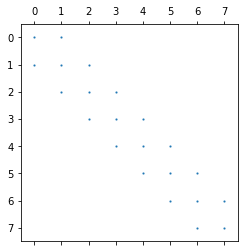

In [7]:
import numpy as np
import scipy.sparse as sp
import math
import matplotlib.pylab as plt
from mpl_toolkits import mplot3d

L = 1
n = 10
x = np.linspace(0, L, num = n)

A = sp.diags([1, -2, 1], [-1, 0, 1], (n-2, n-2))

plt.spy(A, markersize=1)
plt.show()

## 2D

* Without loss of generality, the problem is discretized in a rectangular domain in the $(x, y)$ plane using a uniformly spaced mesh
* $M + 1$ grid points in the $x$ direction $(x_i, \; i = 0, 1, 2, 3, . . . , M)$ 
  * $M – 1$ interior points,  
  * Boundaries are located at $x_0$ and $x_M$ respectively.
* $N + 1$ points are used in the $y$ direction.
* The second derivatives in the $\nabla^2$ are approximated by second-order finite difference operators
* For simplicity assume that $\Delta_x = \Delta_y = \Delta$
* Equation for $\phi_{i,j}$ becomes:
$$
\phi_{i+1,j} - 4\phi_{i,j} + \phi_{i-1,j} + \phi_{i,j+1} + \phi_{i,j-1} = \Delta^2f_{i,j}
$$

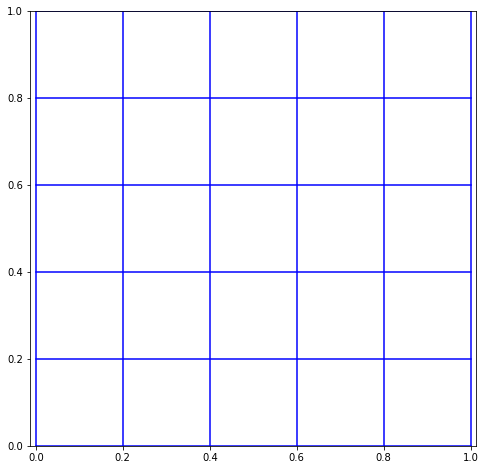

In [12]:
# Mesh

m    = 6
n    = 6
L    = 1
x    = np.linspace(0, L, num = m) 
y    = np.linspace(0, L, num = n)

# -------------------------------

plt.figure(figsize=(8,8))

X, Y = np.meshgrid(x, y)

plt.plot(X, Y, 'b-')
plt.plot(X.T, Y.T, 'b-')

plt.xlim(0,L)
plt.ylim(0,L)

plt.axis('equal')

plt.show()

Common ordering, not accounting for BC's

![Common ordering](./pic1.png)


### Accounting for BC's

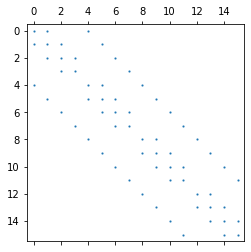

In [13]:
# A second order derivative matrix in 1D
G = sp.diags([1, -2, 1], [-1, 0, 1], (n-2, n-2))

# A second order derivative matrix in 2D
G1  = sp.diags([1, -2, 1], [-1, 0, 1], (m-2, m-2))
Gx  = sp.kron(sp.eye(n-2), G1)
G2  = sp.diags([1, -2, 1], [-1, 0, 1], (n-2, n-2))
Gy  = sp.kron(G2, sp.eye(m-2) )

A = Gx + Gy

plt.spy(A, markersize=1)
plt.show()

### Iterative solution methods

* In fact the methodology that will be developed is for solving general systems of linear algebraic equations, $Ax = b$, which may or may not have been derived from a particular partial differential equation.
* In solving a system of algebraic equations iteratively, one begins with a “guess” for the solution, and uses an algorithm to iterate on this guess which hopefully improves the solution.
* In contrast to Gauss elimination where the exact solution of a system of linear equations is obtained (to within computer round-off error), **with iterative methods an approximate solution to a prescribed accuracy is sought**. 
* In the problems, where the system of algebraic equations is obtained from numerical approximation (discretization) of a differential equation, the choice of iterative methods is  justified, as **the equations represent an approximation to the differential equation and therefore it would not be necessary to obtain the exact solution of approximate equations**.
* The expectation is that accuracy improves by increasing the number of iterations --> the method *converges* to the exact solution as the number of iterations increases.
* Matrices obtained from discretizing PDEs are usually sparse (a lot more zero than non- zero elements) and iterative methods are particularly advantageous in memory requirements with such systems.

Consider $\mathbf{A}x = \mathbf{b}$, and let $\mathbf{A} = \mathbf{A}_1 - \mathbf{A}_2$, resulting in:
$$
\mathbf{A}_1 x = \mathbf{A}_2 x + \mathbf{b}.
$$
An iterative solution is constructed as follows:
$$
\mathbf{A}_1 x^{(k+1)} = \mathbf{A}_2 x^{(k)} + \mathbf{b},
$$
where $k = 0,1,2,\cdots$ is the iteration index.

**Algorithm** :
1. Initial guess for the solution $x^{(0)}$
2. Solve for $x^{(1)}$ using $\mathbf{A}_1 x^{(k+1)} = \mathbf{A}_2 x^{(k)} + \mathbf{b}$

**Requirements** : 
1. $A_1$ should be easily "invertible". Otherwise, at each iteration we are faced with solving a system of equations that can be as difficult as the original system, $\mathbf{A}x = \mathbf{b}$.
2. Iterations should converge (hopefully rapidly), 
$$
\lim\limits_{k \to \infty} x^{(k)} = x
$$

**Criterion for convergence** :  
* Error at $k^{th}$ iteration, $\epsilon^{(k)}$:
$$
\epsilon^{(k)} = x - x^{k}
$$
* Replacing in $\mathbf{A}_1 x = \mathbf{A}_2 x + \mathbf{b}$ and subtracting gives
$$
\mathbf{A}_1\epsilon^{(k+1)} = \mathbf{A}_2\epsilon^{(k)} \rightarrow \epsilon^{(k+1)} = \mathbf{A}_1^{-1}\mathbf{A}_2\epsilon^{(k)}
$$
* Error at iteration $k$ is related to the initial error via
$$
\epsilon^{(k+1)} = \left(\mathbf{A}_1^{-1}\mathbf{A}_2\right)^k\epsilon^{(0)}
$$
* For convergence we should have
$$
\lim\limits_{k \to \infty} \epsilon^{(k)} = 0
$$
* We know from linear algebra that this will happen if
$$
\rho = |\lambda_i|_{max} \le 1
$$
where $\lambda_i$ are the eigenvalues of the matrix $\mathbf{A}_1^{-1}\mathbf{A}_2$.
* $\rho$ is called the *spectral radius* of convergence of the iterative scheme and is related to its rate of convergence.
* The performance of any iterative scheme and its rate of convergence are directly connected to the matrix $A$ and its decomposition into $A_1$ and $A_2$.

## Point Jacobi Method

The simplest choice:  $A_1 = D $, where $D$ consists of the diagonal elements of $A$, $a_{ii}$.

* It satisfies the first requirement --> easily invertible
* In the example: $A_1$ would be a diagonal matrix with $-4$ on the diagonal
* Application of the point Jacobi method to the system of equations:
$$
\phi^{(k+1)} = -\dfrac{1}{4}A_2\phi^{(k)} -\dfrac{1}{4}R
$$
where $R$ is the right-hand vector of the above equation.

* Using the index notation: 
$$
\phi_{i,j}^{(k+1)} = \dfrac{1}{4}\left[\phi_{i-1,j}^{(k)} + \phi_{i+1,j}^{(k)} + \phi_{i,j-1}^{(k)} + \phi_{i,j+1}^{(k)} \right] - \dfrac{1}{4}R_{i,j}
$$
the indices $i$ and $j$ are used in the same order as in the construction of $A$.

* Starting with an initial guess $\phi_0$, subsequent approximations, $\phi_1$, $\phi_2$,..., are easily computed.

* **Note**: Application of point Jacobi does not involve storage or manipulation with any matrices. One simply updates the value of $\phi$ at the grid point $(ij)$ using a simple average of the surrounding values (north, south, east, and west) from the previous iteration.

* For convergence, the eigenvalues of the matrix $A^{-1}_1 A_2 = −\dfrac{1}{4}A_2$ must be computed

* The eigenvalues of this system are:
$$
\lambda_{mn} = \dfrac{1}{2}\left[cos(\dfrac{m\pi}{M}) + cos(\dfrac{n\pi}{N}) \right]
$$
where, $m = 1,2,3,\cdots,M-1$, and $n = 1,2,3,\cdots,N-1$.

* It is clear that $|\lambda_{mn}| < 1$ for all $m$ and $n$, and the method converges.

* Approximating the maximum eigenvalue: 
$$
|\lambda_{max}| = 1-\dfrac{1}{4}\left[\dfrac{\pi^2}{M^2} + \dfrac{\pi^2}{N^2} \right] + \cdots
$$

* For large $M$ and $N$ , $|\lambda_{max}|$ is only slightly less than 1, and the convergence is very slow.

* This is why the point Jacobi method is rarely used in practice, but it does provide a good basis for development and comparison with improved methods.

### Algorithm 

![Algorithm](./pic4.png)

## Gauss-Seidel Method

* Using the matrix splitting notation:
$$
A = A_1 - A_2
$$

* For Gauss–Seidel method:
$$
A_1 = D-L \;\; \textrm{and} \;\; A_2 = U
$$
where, 
  * $D$ is the diagonal matrix consisting of the diagonal elements of $A$.
  * $L$ is the lower triangular matrix consisting of the negative of the lower triangular elements of $A$. 
  * $U$ is an upper triangular matrix consisting of the negative of the upper triangular elements of $A$.
  * Matrices $L$ and $U$ are not to be confused with the usual LU-decomposition of $A$ discussed in the context of Gauss elimination in linear algebra

* Resulting:
$$
\phi_{ij}^{(k+1)} = \dfrac{1}{4}\left[\phi_{i-1,j}^{(k+1)} + \phi_{i+1,j}^{(k)} + \phi_{i,j-1}^{(k+1)} + \phi_{i,j+1}^{(k)} \right] - \dfrac{1}{4}R_{ij}
$$

* the eigenvalues of the matrix $A_1^{-1} A_2$ are simply squares of the eigenvalues of the point Jacobi method
$$
\lambda_{mn} = \dfrac{1}{4}\left[cos(\dfrac{m\pi}{M}) + cos(\dfrac{n\pi}{N}) \right]^2
$$
where, $m = 1,2,3,\cdots,M-1$, and $n = 1,2,3,\cdots,N-1$.

* Gauss–Seidel method converges twice as fast as the point Jacobi method --> requires half as many iterations as the point Jacobi method.

### Algorithm

![Algorithm](./pic5.png)

## Succesive over relaxation scheme

* This method attempts to increase the rate of convergence of the Gauss–Seidel method by introducing a parameter into the iteration scheme and then optimizing it for fast convergence
* The rate of convergence depends on the largest eigenvalue of the iteration matrix, $A_1^{-1}A_2$ 
* Objective: find the optimal parameter to reduce as much as possible the largest eigenvalue
* Consider the Gauss–Seidel method:
$$
(D-L)\phi^{(k+1)} = U\phi^{(k)} + \mathbf{b}
$$
* Change in the solution between two successive iterations:
$$
\mathbf{d} = \phi^{(k+1)} - \phi^{(k)}
$$
Leading to:
$$
\phi^{(k+1)} = \phi^{(k)} + \mathbf{d}
$$
* Increase (accelerate) the change between two successive iterations by using an acceleration parameter
$$
\phi^{(k+1)} = \phi^{(k)} + \omega\mathbf{d}
$$
   * $\omega > 1$ --> the acceleration or “relaxation” parameter
   * $\omega < 1$ --> decelerating (reducing) the change at each iteration
   * $\omega = 1$ --> Gauss–Seidel method

* In SOR use the Gauss–Seidel method to compute an intermediate solution, $\tilde{\phi}$
$$
D\tilde{\phi}^{(k+1)} = L\phi^{(k+1)} + U\phi^{(k)} + \mathbf{b}
$$
  * The solution at the next step
  $$
  \phi^{(k+1)} = \phi^{(k)} + \omega(\tilde{\phi}^{(k+1)} - \phi^{(k)})
  $$
  * $\omega$ yet to be determined
  * Eliminate $\tilde{\phi}^{(k+1)}$
  $$
  \phi^{(k+1)} = \underbrace{(I - \omega D^{-1}L)^{-1}[(1-\omega)I + \omega D^{-1}U]}_{G_{SOR}} \;\phi^{(k)}  + (I-\omega D^{-1}L)^{-1}\omega D^{-1}\mathbf{b}
  $$

* For discretized Poisson operator, the eigenvalues are given by
$$
\lambda^{1/2} = \dfrac{1}{2}\left(\pm |\mu|\omega \pm \sqrt{\mu^2 \omega^2 -4(\omega -1)} \right),
$$
where, $\mu$ is an eigenvalue of th point Jacobi matrix, $G_J  = D^{-1}(L+U)$.

* To optimize convergence, select $\omega$ such that the largest eigenvalue is minimized.
* $\dfrac{d\lambda}{d\omega} = 0$ does not have a solution.
* An absolute minimum exist, when the argument under tha square root is zero. 

![SOR](./pic7.png)
 
* With $\mu_{max} = 0.9945$ (largest eigenvalue of the point Jacobi method, which dependa on the number of grid points used). This value correspons to a mesh of $31\times 31$.   
* And
$$
\omega_{opt} = \frac{2}{1+\sqrt{1-\mu_{max}^2}}
$$ 

![algorithm_SOR](./pic6.png)

In [2]:
#There is a nice trick: wrap the data with pandas DataFrame.
import pandas as pd
data = [[1, 2], [3, 4]]
pd.DataFrame(data, columns=["Foo", "Bar"])

,Foo,Bar
0,1,2
1,3,4
